In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logit
sys.path.append('../src')

from neural_network import NeuralNetwork, Neuron
from functions_helpper import get_training_data, f, g, h

# Ej 6 parte b

Considere las siguientes funciones con las entradas en el rango [-1,1] :
    
    f(x) = x3-x2+1 
    g(x,y) = 1- x2 - y2 
    h(x,y) =x+y

Utilice su implementación para ajustar estas funciones, inicializando los pesos con valores aleatorios y utilizando como ejemplos de entrenamiento 40 puntos uniformemente distribuidos en el espacio. 

Grafique:
    
    i.  el error cometido en el conjunto de entrenamiento en cada iteración;
    ii. las aproximación de las funciones obtenidas luego de 10^2, 10^3, 10^4 y 10^5 iteraciones.


In [2]:
#Ajusta y grafica los resutlados
def plot_results(neural_network_f, neural_network_g, neural_network_h):
    
    training_data = get_training_data ()
    
    data_f = training_data.drop (['g', 'h'], axis=1)
    neural_network_f.fit (training_examples=data_f, target_attribute='f')

    data_g = training_data.drop (['f', 'h'], axis=1)
    data_g['g'] = data_g['g'].apply (lambda x: Neuron.sigmoid (x))
    neural_network_g.fit (training_examples=data_g, target_attribute='g')

    data_h = training_data.drop (['f', 'g'], axis=1)
    data_h['h'] = data_h['h'].apply (lambda x: Neuron.sigmoid(x))
    neural_network_h.fit (training_examples=data_h, target_attribute='h')
    
    print('Redes despues de fit')
    print('Red f')
    neural_network_f.print()
    print ('Red g')
    neural_network_g.print ()
    print ('Red h')
    neural_network_h.print ()    

    P = [[],[],[]]
    F = training_data['f']
    G = training_data['g']
    H = training_data['h']

    for index, point in data_f.drop(['f'], axis=1).iterrows():

        predict_f = neural_network_f.predict(point)
        P[0].append(predict_f)

        predict_g = neural_network_g.predict(point)
        P[1].append(logit(predict_g))

        predict_h = neural_network_h.predict(point)
        P[2].append(logit(predict_h))


    plt.grid(True)
    plt.ylabel ('Max Iter='+str(max_iter))
    plt.plot(neural_network_f.get_errors(), color='b', label='Error f')
    plt.plot (neural_network_g.get_errors (), color='r', label='Error g')
    plt.plot (neural_network_h.get_errors (), color='y', label='Error h')
    plt.legend (loc=0)
    plt.show ()

    plt.grid(True)
    plt.ylabel ('Max Iter='+str(max_iter))
    plt.plot(P[0], color='b', label='Predict')
    plt.plot(F, color='r', label='f')
    plt.legend (loc=0)
    plt.show ()

    plt.grid(True)
    plt.ylabel ('Max Iter=' + str (max_iter))
    plt.plot(P[1], color='b', label='Predict')
    plt.plot(G, color='r', label='g')
    plt.legend (loc=0)
    plt.show ()

    plt.grid(True)
    plt.ylabel ('Max Iter=' + str (max_iter))
    plt.plot(P[2], color='b', label='Predict')
    plt.plot(H, color='r', label='h')
    plt.legend (loc=0)
    plt.show ()
    


Para cada función creamos una red neuronal con 2 entradas, una capa oculta con 2 neuronas y una salida, inicializamos los pesos de la red de forma aleatoria.

In [3]:
def get_neural_network(max_iter):
    
    hidden_layer_weights = [np.random.rand(2), np.random.rand(2)]
    output_layer_weights = [np.random.rand(2)]
    hidden_bias = np.random.rand(2)
    output_bias = np.random.rand(1)
    
    neural_network_f = NeuralNetwork(
                input_layer_size=2,
                hidden_layer_size=2,
                output_layer_size=1,
                hidden_layer_weights=hidden_layer_weights,
                output_layer_weights=output_layer_weights,
                hidden_layer_bias=hidden_bias,
                output_layer_bias=output_bias,
                max_iter=max_iter
    )

    neural_network_g = NeuralNetwork(
                input_layer_size=2,
                hidden_layer_size=2,
                output_layer_size=1,
                hidden_layer_weights=hidden_layer_weights,
                output_layer_weights=output_layer_weights,
                hidden_layer_bias=hidden_bias,
                output_layer_bias=output_bias,
                max_iter=max_iter
    )

    neural_network_h = NeuralNetwork(
                input_layer_size=2,
                hidden_layer_size=2,
                output_layer_size=1,
                hidden_layer_weights=hidden_layer_weights,
                output_layer_weights=output_layer_weights,
                hidden_layer_bias=hidden_bias,
                output_layer_bias=output_bias,
                max_iter=max_iter
    )

    print('Redes iniciales')
    print('Red f')
    neural_network_f.print()
    print ('Red g')
    neural_network_g.print ()
    print ('Red h')
    neural_network_h.print ()
    
    return neural_network_f, neural_network_g, neural_network_h

Para todos los casos se usaron los mismos pesos iniciales e igual disenño de red.

En el caso de las funciones f y g como su codominio es distinto del codominio de la función sigmoide que utilizamos en la capa de salida de la red neuronal, el entrenamiento se realizó con el resultado de aplicar la función sigmoide a la función h (h_entrenamiento = sigmoid(h(x,y))) y luego para graficar los datos se utiliza la función logit para obtener el valor dentro del codominio de h (h_aproximado = logit(predict)).


# Iteraciones = 10 ^2

Redes iniciales
Red f
------------------------
Amount of Inputs
2
------------------------
---> Hidden Layer
Total neurons: 2
   Neuron 0
      Weight: 0.3035499984624992
      Weight: 0.96404257997234
      Bias: 0.15215556264244312
   Neuron 1
      Weight: 0.8376986668018996
      Weight: 0.9054271999547275
      Bias: 0.7994488292445178
------------------------
---> Output Layer
Total neurons: 1
   Neuron 0
      Weight: 0.538950296658443
      Weight: 0.7788338423194958
      Bias: 0.7494282171654767
Red g
------------------------
Amount of Inputs
2
------------------------
---> Hidden Layer
Total neurons: 2
   Neuron 0
      Weight: 0.3035499984624992
      Weight: 0.96404257997234
      Bias: 0.15215556264244312
   Neuron 1
      Weight: 0.8376986668018996
      Weight: 0.9054271999547275
      Bias: 0.7994488292445178
------------------------
---> Output Layer
Total neurons: 1
   Neuron 0
      Weight: 0.538950296658443
      Weight: 0.7788338423194958
      Bias: 0.74942821716

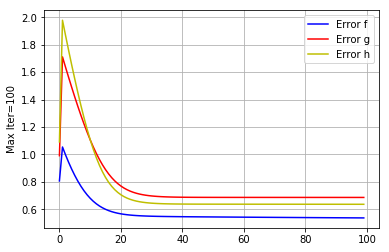

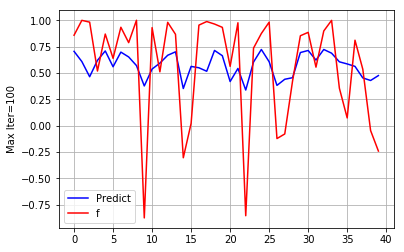

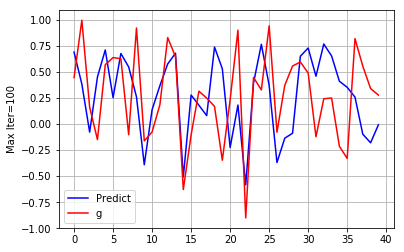

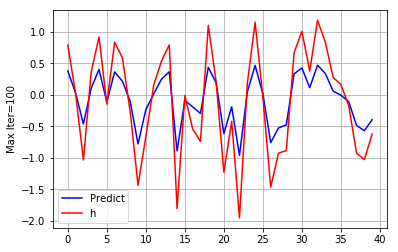

In [4]:
    max_iter = 10 ** 2
    
    #Creamos la red neuronal con 2 entradas, una capa oculta con 2 neuronas y una salida
    neural_network_f, neural_network_g, neural_network_h = get_neural_network(max_iter)
    plot_results(neural_network_f, neural_network_g, neural_network_h)
    

# Iteraciones = 10 ^3

Redes iniciales
Red f
------------------------
Amount of Inputs
2
------------------------
---> Hidden Layer
Total neurons: 2
   Neuron 0
      Weight: 0.2553292223386192
      Weight: 0.8013350853779985
      Bias: 0.6457498670865011
   Neuron 1
      Weight: 0.7014023734772287
      Weight: 0.29703966571516105
      Bias: 0.742705399175477
------------------------
---> Output Layer
Total neurons: 1
   Neuron 0
      Weight: 0.477421491400458
      Weight: 0.028995961313003416
      Bias: 0.2123369322425711
Red g
------------------------
Amount of Inputs
2
------------------------
---> Hidden Layer
Total neurons: 2
   Neuron 0
      Weight: 0.2553292223386192
      Weight: 0.8013350853779985
      Bias: 0.6457498670865011
   Neuron 1
      Weight: 0.7014023734772287
      Weight: 0.29703966571516105
      Bias: 0.742705399175477
------------------------
---> Output Layer
Total neurons: 1
   Neuron 0
      Weight: 0.477421491400458
      Weight: 0.028995961313003416
      Bias: 0.21233

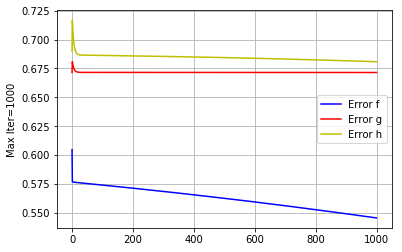

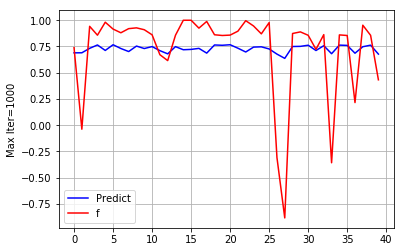

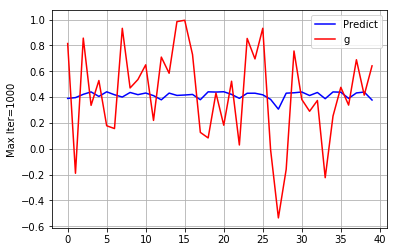

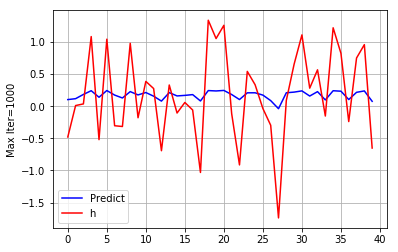

In [5]:
    max_iter = 10 ** 3
    
    #Creamos la red neuronal con 2 entradas, una capa oculta con 2 neuronas y una salida
    neural_network_f, neural_network_g, neural_network_h = get_neural_network(max_iter)
    plot_results(neural_network_f, neural_network_g, neural_network_h)

# Iteraciones = 10 ^4

Redes iniciales
Red f
------------------------
Amount of Inputs
2
------------------------
---> Hidden Layer
Total neurons: 2
   Neuron 0
      Weight: 0.9518808447422781
      Weight: 0.8289049858559852
      Bias: 0.4448734705267171
   Neuron 1
      Weight: 0.17100087623662763
      Weight: 0.0015276893734250674
      Bias: 0.17277915147092537
------------------------
---> Output Layer
Total neurons: 1
   Neuron 0
      Weight: 0.9124031833308447
      Weight: 0.7910468508746811
      Bias: 0.3004399373052298
Red g
------------------------
Amount of Inputs
2
------------------------
---> Hidden Layer
Total neurons: 2
   Neuron 0
      Weight: 0.9518808447422781
      Weight: 0.8289049858559852
      Bias: 0.4448734705267171
   Neuron 1
      Weight: 0.17100087623662763
      Weight: 0.0015276893734250674
      Bias: 0.17277915147092537
------------------------
---> Output Layer
Total neurons: 1
   Neuron 0
      Weight: 0.9124031833308447
      Weight: 0.7910468508746811
      Bias:

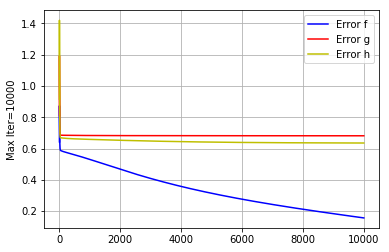

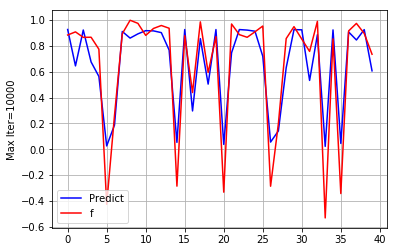

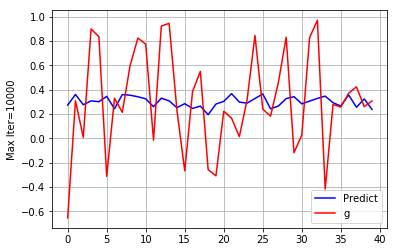

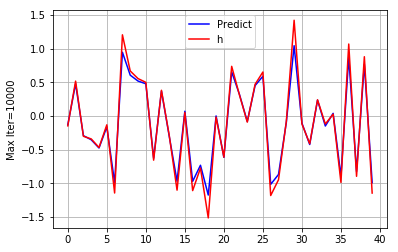

In [6]:
    max_iter = 10 ** 4
    
    #Creamos la red neuronal con 2 entradas, una capa oculta con 2 neuronas y una salida
    neural_network_f, neural_network_g, neural_network_h = get_neural_network(max_iter)
    plot_results(neural_network_f, neural_network_g, neural_network_h)

# Iteraciones = 10 ^5

Redes iniciales
Red f
------------------------
Amount of Inputs
2
------------------------
---> Hidden Layer
Total neurons: 2
   Neuron 0
      Weight: 0.027835480525670975
      Weight: 0.5353172899387056
      Bias: 0.86206125998457
   Neuron 1
      Weight: 0.6663272200743332
      Weight: 0.45490516397306624
      Bias: 0.13848227983129258
------------------------
---> Output Layer
Total neurons: 1
   Neuron 0
      Weight: 0.18212819439687944
      Weight: 0.20423683508631973
      Bias: 0.8185073888691773
Red g
------------------------
Amount of Inputs
2
------------------------
---> Hidden Layer
Total neurons: 2
   Neuron 0
      Weight: 0.027835480525670975
      Weight: 0.5353172899387056
      Bias: 0.86206125998457
   Neuron 1
      Weight: 0.6663272200743332
      Weight: 0.45490516397306624
      Bias: 0.13848227983129258
------------------------
---> Output Layer
Total neurons: 1
   Neuron 0
      Weight: 0.18212819439687944
      Weight: 0.20423683508631973
      Bias: 0

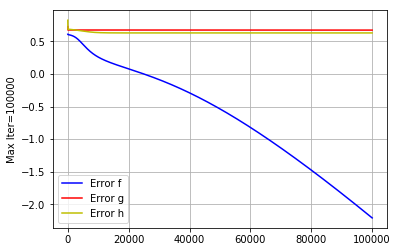

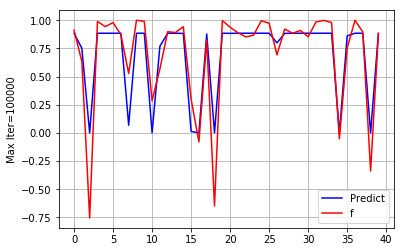

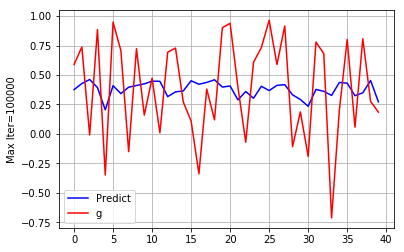

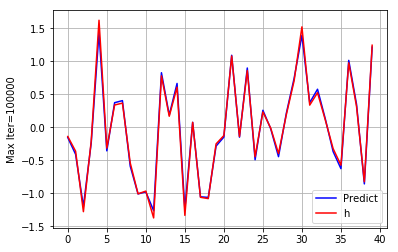

In [4]:
    max_iter = 10 ** 5
    
    #Creamos la red neuronal con 2 entradas, una capa oculta con 2 neuronas y una salida
    neural_network_f, neural_network_g, neural_network_h = get_neural_network(max_iter)
    plot_results(neural_network_f, neural_network_g, neural_network_h)